In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [116]:
df = pd.read_csv('data.csv')
df.head()

,cty_name,year,oil_prod32_14,gas_prod55_14,oil_price_nom,oil_price_2000,gas_price_nom,gas_price_2000,oil_value_nom,oil_value_2000,oil_value_2014,gas_value_nom,gas_value_2000,gas_value_2014
0,Afghanistan,1960,0.0,0.0,1.9,10.912870,0.14,2.891920,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,1961,0.0,0.0,1.8,10.236770,0.15,3.021408,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,1962,0.0,0.0,1.8,10.124090,0.16,3.194060,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,1963,0.0,0.0,1.8,9.994071,0.16,3.150898,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,1964,0.0,0.0,1.8,9.864053,0.15,2.935082,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Анализ основных свойств данных

## 1.2 Расчёт статистических характеристик данных

In [117]:
df.describe()

,year,oil_prod32_14,gas_prod55_14,oil_price_nom,oil_price_2000,gas_price_nom,gas_price_2000,oil_value_nom,oil_value_2000,oil_value_2014,gas_value_nom,gas_value_2000,gas_value_2014
count,10240.000000,1.024000e+04,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,1.024000e+04,1.024000e+04,1.024000e+04,1.024000e+04,1.024000e+04,1.024000e+04
mean,1983.052148,1.829921e+07,98.945332,26.442984,31.920580,1.989426,3.674097,4.054767e+09,3.052966e+09,8.206470e+09,1.810151e+09,2.130068e+09,2.928361e+09
std,20.148288,6.342195e+07,429.233489,30.267818,22.911769,1.975970,1.440833,2.004262e+10,2.558784e+10,3.195161e+10,9.192976e+09,9.966033e+09,1.370104e+10
min,1932.000000,0.000000e+00,-2.731692,0.670000,7.879107,0.050000,1.995052,0.000000e+00,-1.271374e+11,0.000000e+00,-1.047918e+10,0.000000e+00,0.000000e+00
25%,1969.000000,0.000000e+00,0.000000,1.930000,12.247720,0.170000,2.719267,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1985.000000,5.600000e+04,0.587137,17.970078,23.698000,1.690000,3.162515,2.477220e+06,5.985169e+06,1.205842e+07,4.650504e+06,1.111180e+07,1.527621e+07
75%,2000.000000,4.553654e+06,72.447926,31.610000,45.818440,2.660000,3.844696,4.407593e+08,6.612926e+08,1.079626e+09,1.348448e+09,2.130066e+09,2.928353e+09
max,2014.000000,6.160000e+08,5605.121816,111.669702,85.170708,7.960000,9.009039,4.044369e+11,3.401958e+11,4.676922e+11,2.445348e+11,2.156113e+11,2.964167e+11


## 1.3 Корреляция данных

In [118]:
df_num = df.select_dtypes(['float', 'int'])

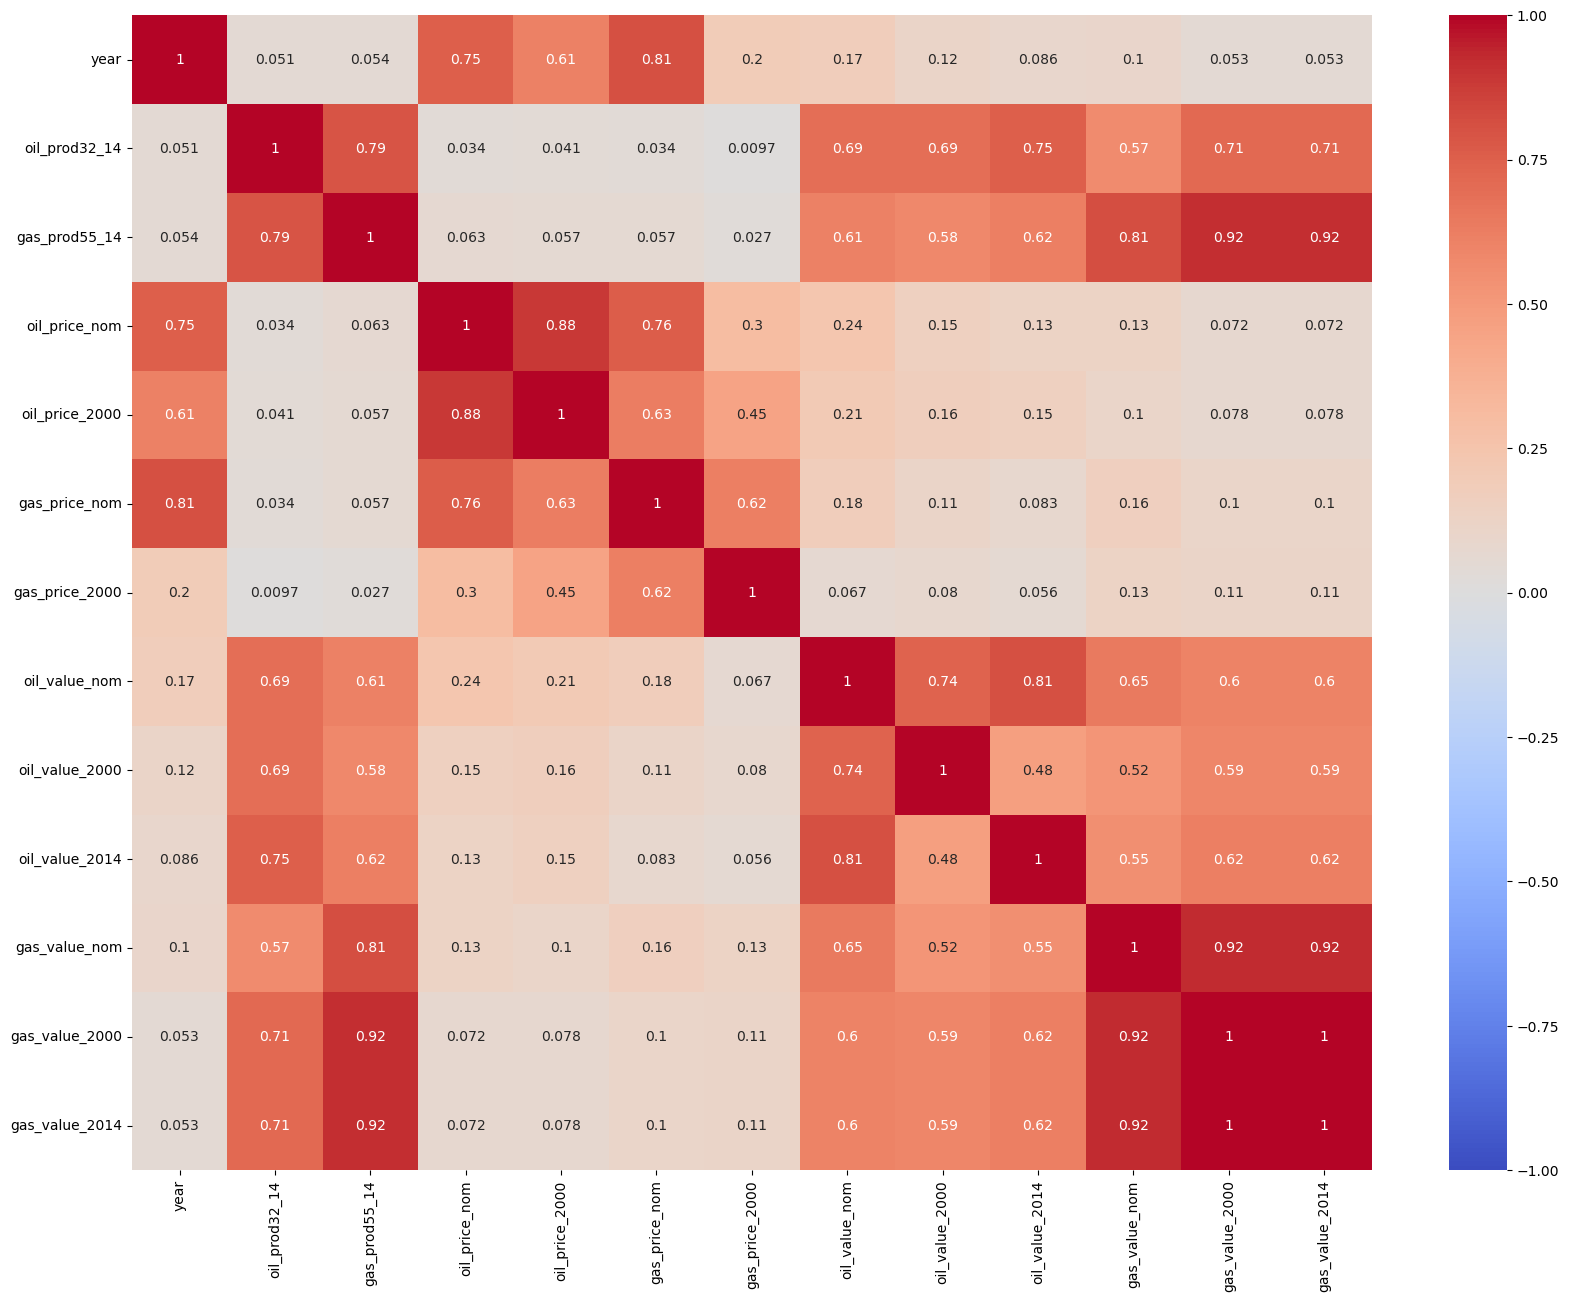

In [119]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_num.corr(), cmap='coolwarm', vmin=-1, vmax=1, center=0, annot=True)
plt.show()

# 2. Поиск зависимотей и временных трендов

## 2.1 Поиск зависимотей

In [120]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cty_name        10240 non-null  object        
 1   year            10240 non-null  datetime64[ns]
 2   oil_prod32_14   10240 non-null  float64       
 3   gas_prod55_14   10240 non-null  float64       
 4   oil_price_nom   10240 non-null  float64       
 5   oil_price_2000  10240 non-null  float64       
 6   gas_price_nom   10240 non-null  float64       
 7   gas_price_2000  10240 non-null  float64       
 8   oil_value_nom   10240 non-null  float64       
 9   oil_value_2000  10240 non-null  float64       
 10  oil_value_2014  10240 non-null  float64       
 11  gas_value_nom   10240 non-null  float64       
 12  gas_value_2000  10240 non-null  float64       
 13  gas_value_2014  10240 non-null  float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory us

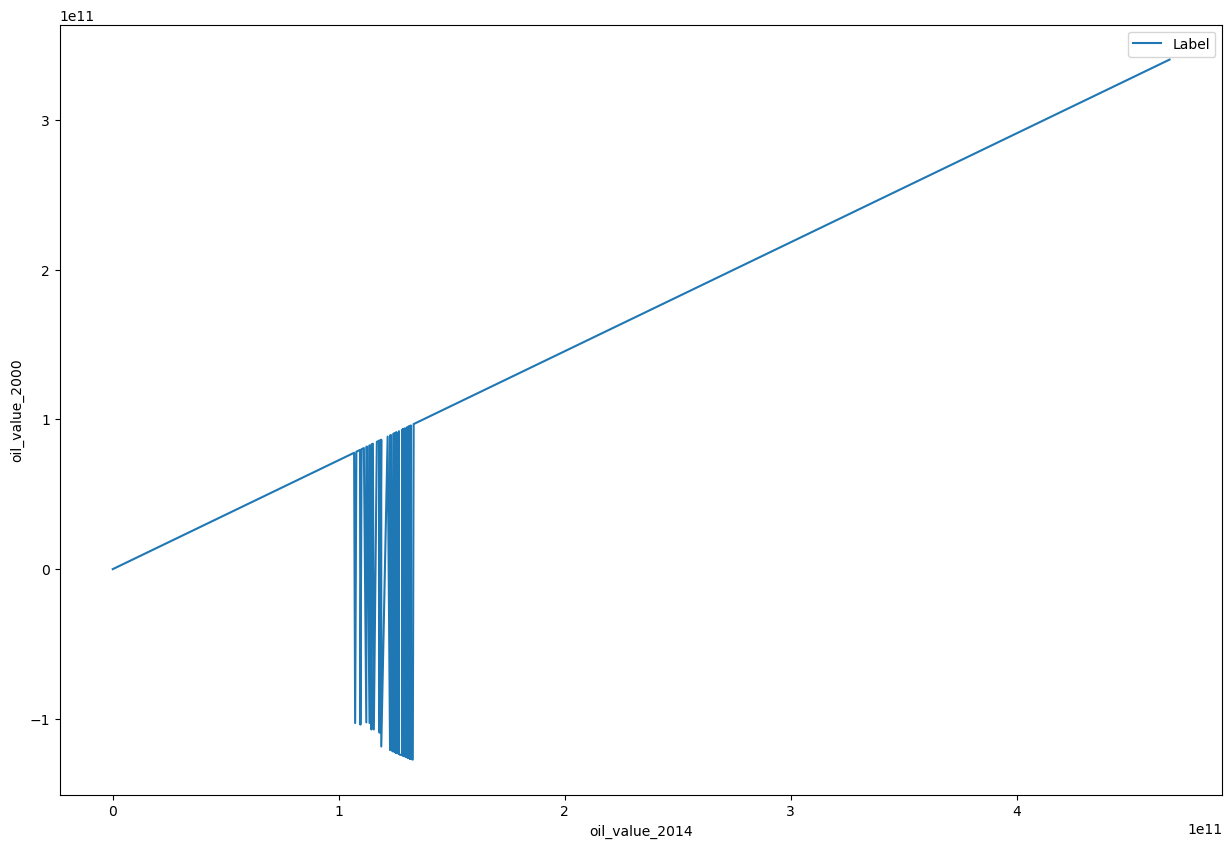

In [144]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='oil_value_2014', y='oil_value_2000', data=df, label='Label')
plt.show()

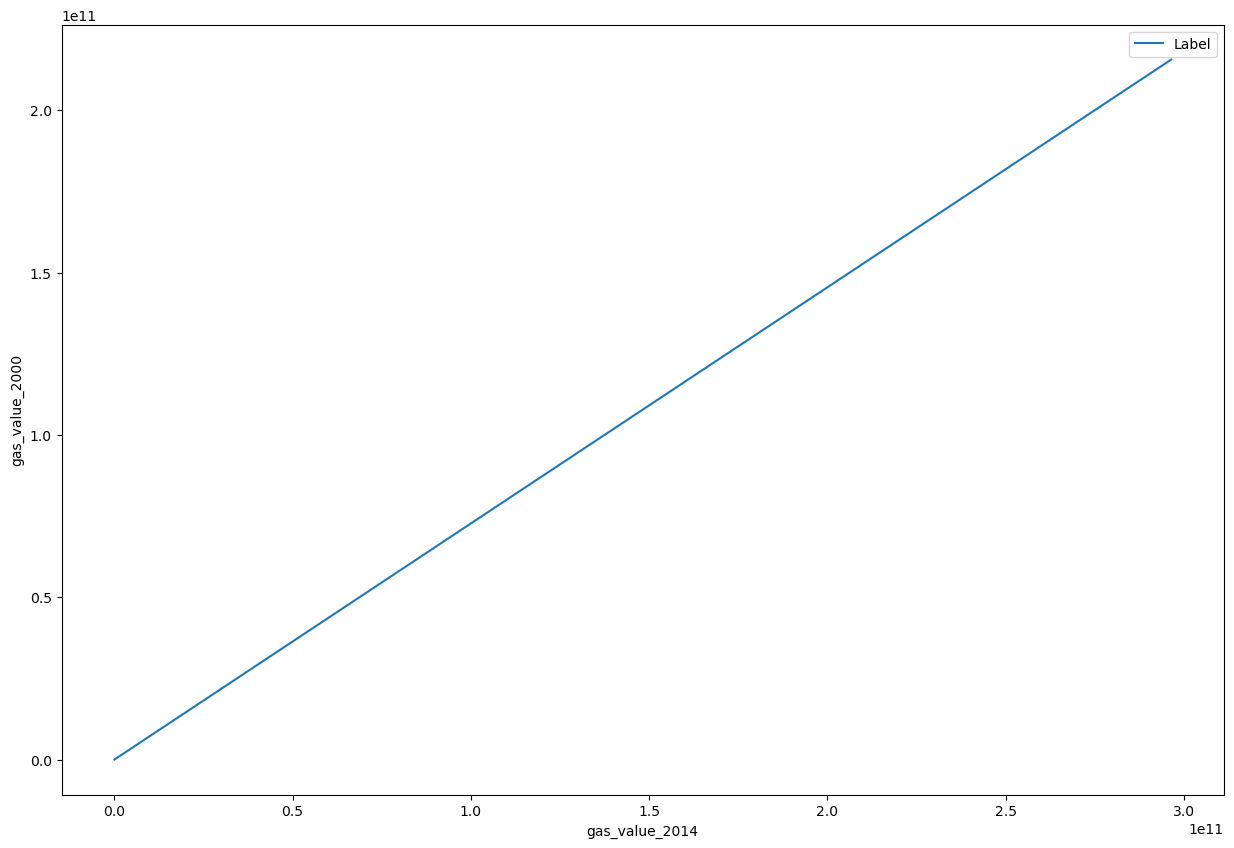

In [145]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='gas_value_2014', y='gas_value_2000', data=df, label='Label')
plt.show()

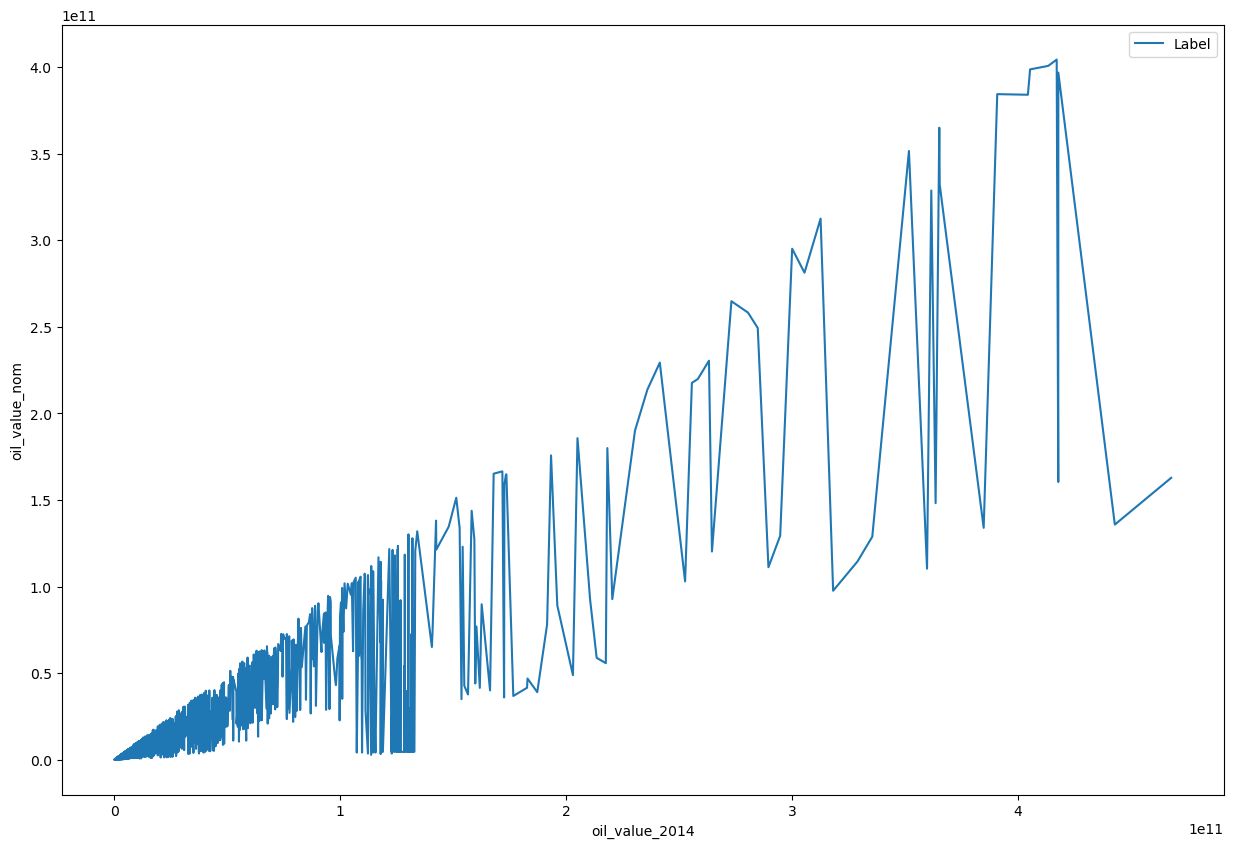

In [162]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='oil_value_2014', y='oil_value_nom', data=df, label='Label')
plt.show()

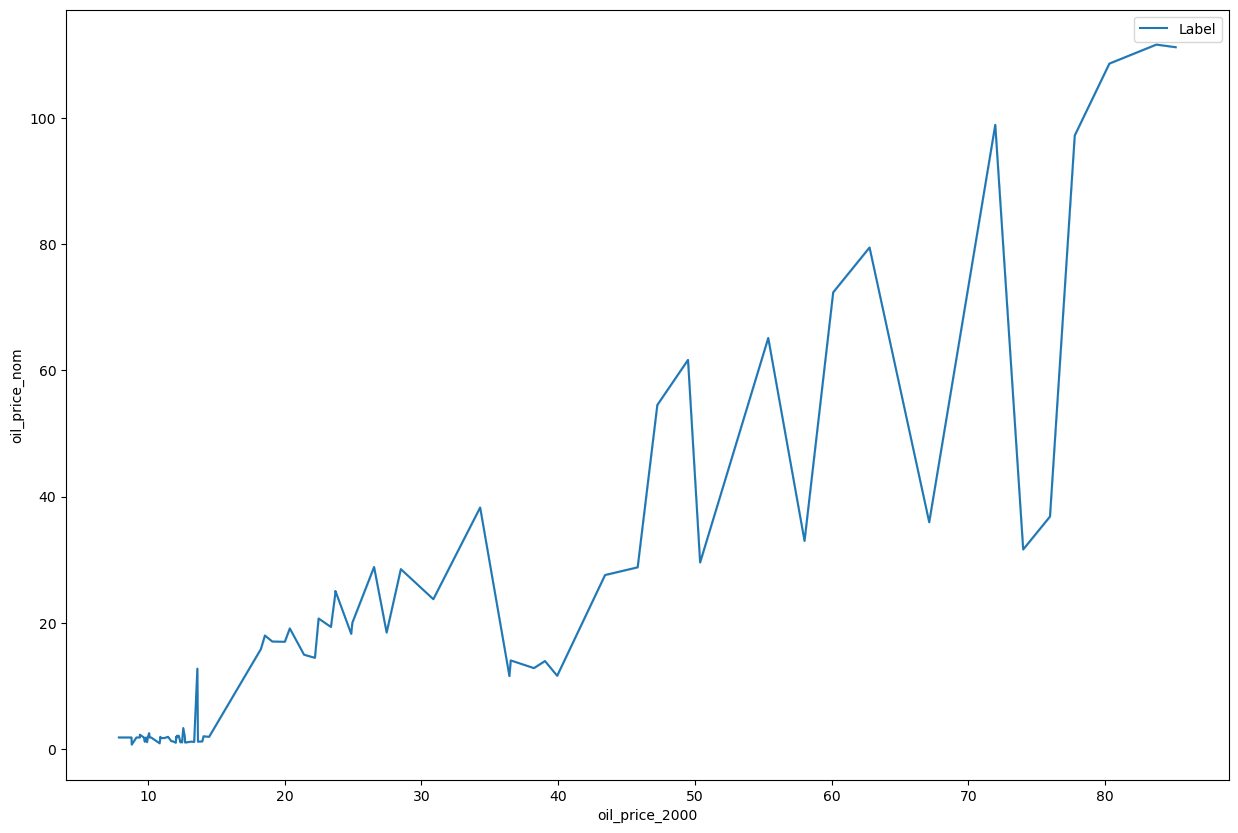

In [151]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='oil_price_2000', y='oil_price_nom', data=df, label='Label')
plt.show()

## 2.2 Кластерный анализ

In [123]:
df_std = pd.DataFrame()
for i in df_num.columns:
    m = df_num[i].mean()
    s = df_num[i].std()
    df_std[i+'_n'] = (df_num[i] - m) / s

In [124]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [131]:
cluster = km.fit_predict(df_std[['gas_prod55_14_n','gas_price_nom_n']])

D:\Programms for college\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [132]:
df_std['cluster'] = cluster

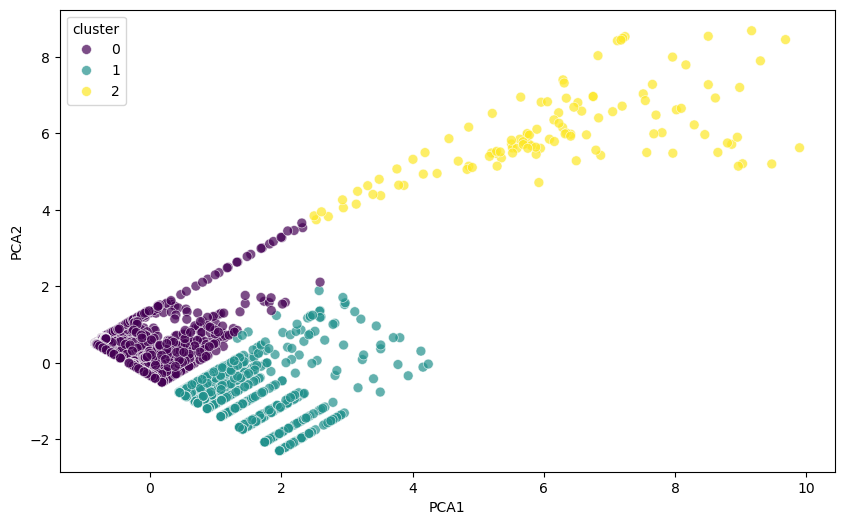

In [133]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_std[['gas_prod55_14_n','gas_price_nom_n']])

df_std['PCA1'] = pca_result[:, 0]
df_std['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_std, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=50, alpha=0.7, edgecolor='w', linewidth=0.5)
plt.show()

## 2.3 Временные тренды

In [163]:
df.columns

Index(['cty_name', 'year', 'oil_prod32_14', 'gas_prod55_14', 'oil_price_nom',
       'oil_price_2000', 'gas_price_nom', 'gas_price_2000', 'oil_value_nom',
       'oil_value_2000', 'oil_value_2014', 'gas_value_nom', 'gas_value_2000',
       'gas_value_2014'],
      dtype='object')

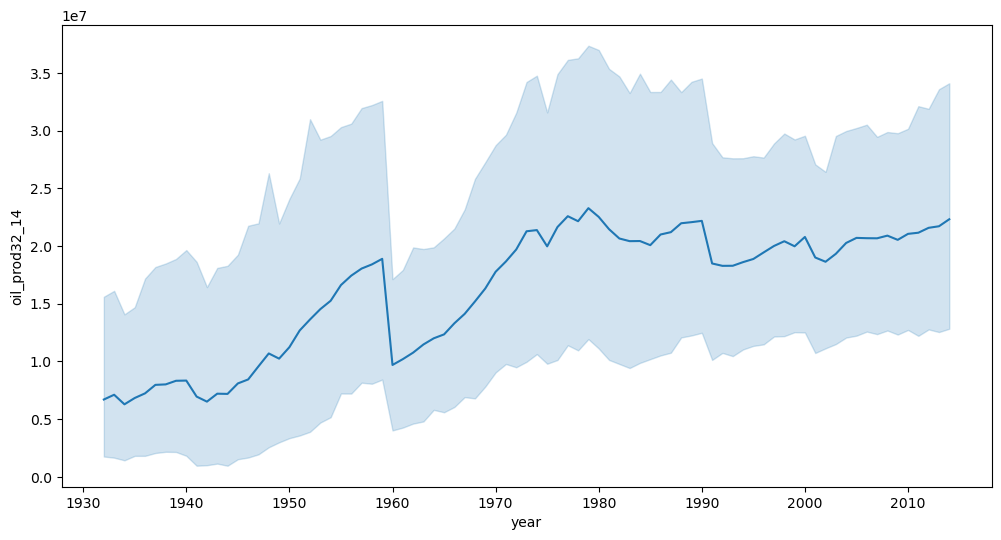

In [164]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='oil_prod32_14')
plt.show()

# 3.Выполнен математический анализ данных 

## 3.1 Проверка на нормальность

In [174]:
from scipy import stats

# Проверка на нормальность
stat, p = stats.normaltest(df_num)

alpha = 0.05
if np.any(p < alpha):
    print("Данные не соответствуют нормальному распределению.")
else:
    print("Данные соответствуют нормальному распределению.")

Данные не соответствуют нормальному распределению.


## 3.2 F-тест или критерий Фишера

In [180]:
# Заданное значение дисперсии (для примера, предположим, что это 1)
sigma_0_squared = 1.0

# Вычисление выборочной дисперсии
s_squared = np.var(df_num, ddof=1)  # ddof=1 для несмещенной оценки дисперсии

# Вычисление статистики F
F = s_squared / sigma_0_squared

# Расчет p-value
df_num1 = len(df_num) - 1
df_denom = np.inf  # Здесь можно выбрать большое значение для df_denom
p_value = stats.f.sf(F, df_num1, df_denom)

print(f"Статистика F: {F}")

alpha = 0.05
if p_value[0] < alpha:  # Обращаемся к первому элементу массива p_value
    print("Отвергаем нулевую гипотезу о равенстве дисперсии")
else:
    print("Принимаем нулевую гипотезу о равенстве дисперсии")

Статистика F: year              4.059535e+02
oil_prod32_14     4.022344e+15
gas_prod55_14     1.842414e+05
oil_price_nom     9.161408e+02
oil_price_2000    5.249492e+02
gas_price_nom     3.904457e+00
gas_price_2000    2.076000e+00
oil_value_nom     4.017068e+20
oil_value_2000    6.547375e+20
oil_value_2014    1.020905e+21
gas_value_nom     8.451080e+19
gas_value_2000    9.932181e+19
gas_value_2014    1.877184e+20
dtype: float64
Принимаем нулевую гипотезу о равенстве дисперсии
